# Artificial Intelligence Lab 5

## Task
1. Для студентов с нечетным порядковым номером в группе датасет с данными про оценки студентов инженерного и педагогического факультетов (для данного датасета нужно ввести метрику: студент успешный/неуспешный на основании грейда)
2. Отобрать случайным образом sqrt(n) признаков
3. Реализовать без использования сторонних библиотек построение дерева решений (дерево не бинарное, numpy и pandas использовать можно, использовать список списков для реализации дерева - нельзя) для решения задачи бинарной классификации 
4. Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall
5. Построить кривые AUC-ROC и AUC-PR (в пунктах 4 и 5 использовать библиотеки нельзя)


## Task 1
1. Для студентов с нечетным порядковым номером в группе датасет с данными про оценки студентов инженерного и педагогического факультетов (для данного датасета нужно ввести метрику: студент успешный/неуспешный на основании грейда)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import entropy

data = pd.read_csv("OLD_DATA.csv")

# Student is successful if grade >= 3
success_threshold = 3
data['successful'] = data['GRADE'].apply(lambda x: 1 if x >= success_threshold else 0)

# Save new data to file
data.to_csv("DATA.csv", index=False)
data


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,COURSE ID,GRADE,successful
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,1


## Task 2
2. Отобрать случайным образом sqrt(n) признаков

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv("DATA.csv")

# Exclude columns that are not features (like ID)
columns_to_exclude = ['STUDENT ID', 'COURSE ID']
features = data.drop(columns=columns_to_exclude)

n = len(features.columns)
num_features = int(np.sqrt(n))

# Select sqrt(n) random features
# selected_features = np.random.choice(features.columns, num_features, replace=False)
selected_features = ['16', '25', '21', '29', '2']
selected_data = data[selected_features]

print(f"Selected features: {selected_features}")
selected_data

Selected features: ['16', '25', '21', '29', '2']


,16,25,21,29,2
0,5,3,1,1,2
1,1,3,1,2,2
2,1,2,1,2,2
3,1,3,1,3,1
4,4,2,1,2,2
...,...,...,...,...,...
140,4,2,1,3,1
141,1,3,1,5,1
142,4,3,1,4,1
143,3,2,1,5,1


## Task 3
3. Реализовать без использования сторонних библиотек построение дерева решений (дерево не бинарное, numpy и pandas использовать можно, использовать список списков для реализации дерева - нельзя) для решения задачи бинарной классификации

In [17]:
import numpy as np
import pandas as pd

data = pd.read_csv('DATA.csv')
# print(data)
# print('')

target = [row[-1] for row in data.values]
target_classes = set(target)
columns_to_exclude = ['STUDENT ID', 'COURSE ID', 'GRADE', 'successful']
data = data.drop(columns_to_exclude, axis=1)
selected_features = ['16', '25', '21', '29', '2']
data = data[selected_features]


def target_entropy():
    total = len(target)
    classes = set(target)
    return sum([-(target.count(c) / total) * np.log2(target.count(c) / total) for c in classes])


def entropy_info(column):
    total = len(column)
    classes = set(column)
    res = 0
    for c in classes:
        ent = 0
        c_total = column.tolist().count(c)
        for t in target_classes:
            prob = sum(1 for a, b in zip(column.tolist(), target) if a == c and b == t) / c_total
            ent -= prob * np.log2(prob) if prob != 0 else 0
        res += (c_total / total) * ent

    return res


def information_gain(column):
    return target_entropy() - entropy_info(column)


def split_info(column):
    total = len(column)
    classes = set(column)
    return sum([-(column.tolist().count(c) / total) * np.log2(column.tolist().count(c) / total) for c in classes])


def gain_ratio(column):
    return information_gain(column) / split_info(column) if split_info(column) != 0 else 0



def build_tree(data, target):
    # Если все значения целевого столбца одинаковы, возвращаем этот класс (листовой узел)
    if len(set(target)) == 1:
        return {target[0]: 1.0}

    # Если атрибутов больше нет, возвращаем наиболее частый класс
    if data.empty:
        total = len(target)
        return {c: target.count(c) / total for c in set(target)}

    # Вычисляем Gain Ratio для каждого атрибута
    gain_ratios = {col: gain_ratio(data[col]) for col in data.columns}

    # Выбираем атрибут с максимальным Gain Ratio
    best_attribute = max(gain_ratios, key=gain_ratios.get)

    # Создаём узел дерева для текущего атрибута
    tree = {best_attribute: {}}

    # Разделяем данные по значениям атрибута
    for value in set(data[best_attribute]):
        subset_data = data[data[best_attribute] == value].drop(columns=[best_attribute])
        subset_target = [t for d, t in zip(data[best_attribute], target) if d == value]

        # Рекурсивно строим поддерево
        tree[best_attribute][value] = build_tree(subset_data, subset_target)

    return tree

# print(build_tree(data, target))

## Task 4
4. Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def predict_proba(tree, sample):
    """
    Предсказывает вероятности классов для одного примера на основе дерева решений.
    
    Параметры:
    tree: dict
        Построенное дерево решений.
    sample: dict
        Один пример в виде словаря: {атрибут: значение}.
        
    Возвращает:
    dict
        Вероятности классов.
    """
    if not isinstance(tree, dict):
        # Если это лист дерева (класс), возвращаем распределение вероятностей для этого класса
        return {tree: 1.0}

    # Получаем атрибут для текущего узла
    attribute = next(iter(tree))
    value = sample.get(attribute)

    # Переходим к следующему поддереву
    if value in tree[attribute]:
        return predict_proba(tree[attribute][value], sample)
    else:
        # Если значение отсутствует в дереве, возвращаем равномерное распределение
        return {c: 1 / len(target_classes) for c in target_classes}


def evaluate_model(tree, data, target):
    """
    Оценивает алгоритм на тестовых данных.
    
    Параметры:
    tree: dict
        Построенное дерево решений.
    data: pd.DataFrame
        Данные для тестирования.
    target: list
        Истинные метки классов.
        
    Возвращает:
    dict
        Метрики оценки: Accuracy, Precision, Recall.
    """
    # Преобразуем данные в список словарей
    samples = data.to_dict(orient='records')
    
    # Получаем предсказания
    predictions = [predict(tree, sample) for sample in samples]
    
    # Вычисляем метрики
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions, average='weighted', zero_division=0)
    recall = recall_score(target, predictions, average='weighted', zero_division=0)
    
    # Результаты
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }
    
    print("Результаты оценки:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Построение дерева решений
tree = build_tree(data, target)

# Оценка модели
evaluate_model(tree, data, target)


Результаты оценки:
Accuracy: 0.8552
Precision: 0.8576
Recall: 0.8552


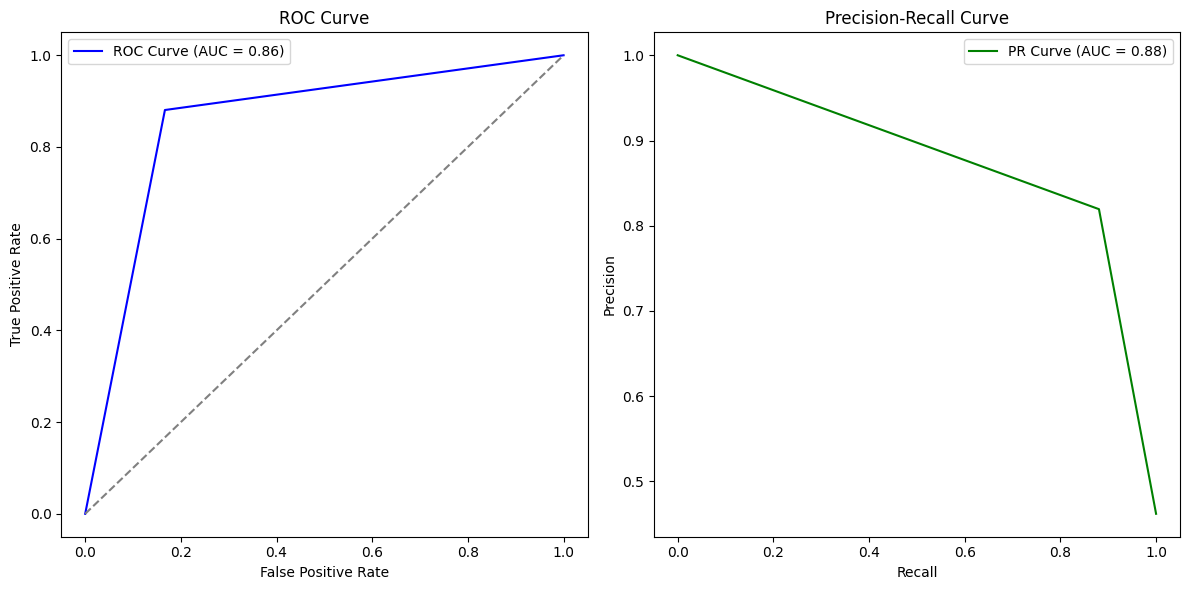

In [16]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Преобразуем данные в список словарей
samples = data.to_dict(orient='records')

# Получаем предсказанные вероятности
predicted_probs = [predict_proba(tree, sample) for sample in samples]

# Формируем вероятности для положительного класса
positive_class = next(iter(target_classes))  # Выберите нужный класс
positive_probs = [proba.get(positive_class, 0) for proba in predicted_probs]

# AUC-ROC
fpr, tpr, _ = roc_curve(target, positive_probs, pos_label=positive_class)
roc_auc = auc(fpr, tpr)

# AUC-PR
precision, recall, _ = precision_recall_curve(target, positive_probs, pos_label=positive_class)
pr_auc = auc(recall, precision)

# Построение графиков
plt.figure(figsize=(12, 6))

# ROC-кривая
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Диагональная линия
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# PR-кривая
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()
